# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [109]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [110]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [111]:
# API url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# URL used for query
query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q="

# Loop to gather weather data
set_count = 1
record_count = 1
weather_data = {"City":[],"Cloudiness":[],"Country":[],"Date":[],"Humidity":[],"Lat":[],"Lng":[],"Max Temp":[],"Wind Speed": []}
for city in cities:
    weather_response = requests.get(query_url + city)
    weather_response_json = weather_response.json()
    
    if weather_response.status_code == 200:
        weather_data["City"].append(city)
        weather_data["Cloudiness"].append(weather_response_json['clouds']['all'])
        weather_data["Country"].append(weather_response_json['sys']['country'])
        weather_data["Date"].append(weather_response_json['dt'])
        weather_data["Humidity"].append(weather_response_json['main']['humidity'])
        weather_data["Lat"].append(weather_response_json['coord']['lat'])
        weather_data["Lng"].append(weather_response_json['coord']['lon'])
        weather_data["Max Temp"].append(weather_response_json['main']['temp_max'])
        weather_data["Wind Speed"].append(weather_response_json['wind']['speed'])
        if record_count <= 50:
            print(f"Processing Record {record_count} of Set {set_count} | {city}")
            record_count += 1 
        else:
            record_count = 0
            set_count += 1
            print(f"Processing Record {record_count} of Set {set_count} | {city}")
            record_count += 1
    else:
        print("No city found here, skipping to next city")
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")

 13 of Set 3 | khatanga
Processing Record 14 of Set 3 | beira
Processing Record 15 of Set 3 | thompson
Processing Record 16 of Set 3 | kavieng
Processing Record 17 of Set 3 | thiruvananthapuram
Processing Record 18 of Set 3 | andapa
Processing Record 19 of Set 3 | baykit
Processing Record 20 of Set 3 | kamiiso
Processing Record 21 of Set 3 | karratha
Processing Record 22 of Set 3 | slatinany
Processing Record 23 of Set 3 | sola
Processing Record 24 of Set 3 | chumikan
Processing Record 25 of Set 3 | broome
Processing Record 26 of Set 3 | ostrovnoy
Processing Record 27 of Set 3 | lebu
Processing Record 28 of Set 3 | imbituba
Processing Record 29 of Set 3 | mitchell
Processing Record 30 of Set 3 | guerrero negro
Processing Record 31 of Set 3 | novoplatnirovskaya
No city found here, skipping to next city
Processing Record 32 of Set 3 | sistranda
Processing Record 33 of Set 3 | cabo san lucas
Processing Record 34 of Set 3 | cidreira
Processing Record 35 of Set 3 | kapaa
Processing Record 3

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [112]:
weather_df = pd.DataFrame(weather_data)
weather_df.to_csv("weather_df.csv", index=False)

In [113]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint-augustin,95,CA,1587579184,83,51.23,-58.65,35.47,13.87
1,calabozo,86,VE,1587579184,37,8.92,-67.43,95.88,6.53
2,mataura,88,NZ,1587579184,85,-46.19,168.86,48.99,5.01
3,punta arenas,40,CL,1587579060,62,-53.15,-70.92,51.80,6.93
4,bredasdorp,0,ZA,1587579185,82,-34.53,20.04,57.20,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

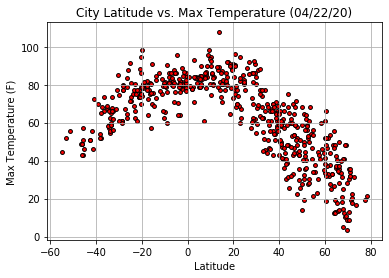

In [114]:
# Scatter Plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], s=15, c="red", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (04/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("Lat_vs_Max_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

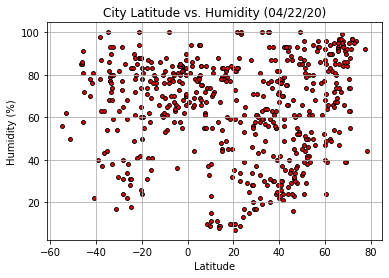

In [115]:
# Scatter Plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], s=15, c="red", edgecolors="black")
plt.title("City Latitude vs. Humidity (04/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("Lat_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

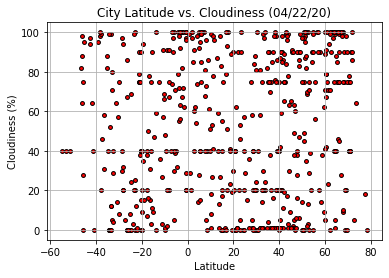

In [116]:
# Scatter Plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], s=15, c="red", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (04/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("Lat_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

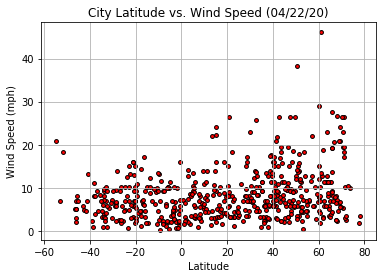

In [117]:
# Scatter Plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], s=15, c="red", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (04/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("Lat_vs_Wind.png")
plt.show()

## Linear Regression

In [118]:
# Create Northern and Southern Hemisphere DataFrames
north_df = weather_df.loc[weather_df["Lat"]>=0.01]
south_df = weather_df.loc[weather_df["Lat"]<=-0.01]
north_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint-augustin,95,CA,1587579184,83,51.23,-58.65,35.47,13.87
1,calabozo,86,VE,1587579184,37,8.92,-67.43,95.88,6.53
5,cleburne,75,US,1587579185,100,32.35,-97.39,73.99,13.87
11,chokurdakh,78,RU,1587578861,95,70.63,147.92,12.83,5.41
14,ilulissat,20,GL,1587579189,39,69.22,-51.10,48.20,20.80


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7331683441379487


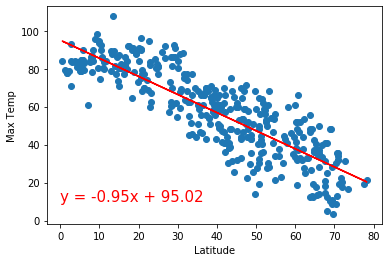

In [119]:
# Add the linear regression equation and line to plot
x_values = north_df["Lat"]
y_values = north_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("Lat_vs_Max_Temp_North.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5211057573628484


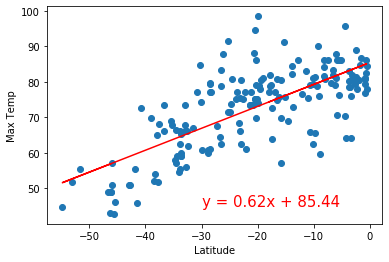

In [120]:
# Add the linear regression equation and line to plot
x_values = south_df["Lat"]
y_values = south_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,45),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("Lat_vs_Max_Temp_South.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04094432373580829


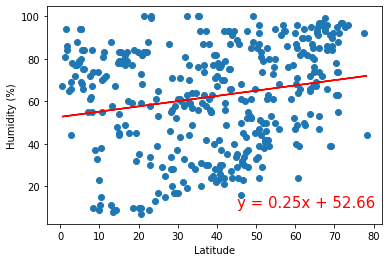

In [121]:
# Add the linear regression equation and line to plot
x_values = north_df["Lat"]
y_values = north_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Lat_vs_Humidity_North.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.012520474730757073


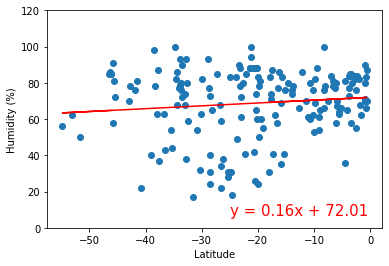

In [122]:
# Add the linear regression equation and line to plot
x_values = south_df["Lat"]
y_values = south_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,7),fontsize=15,color="red")
plt.ylim(0,120)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Lat_vs_Humidity_South.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.016009500706721955


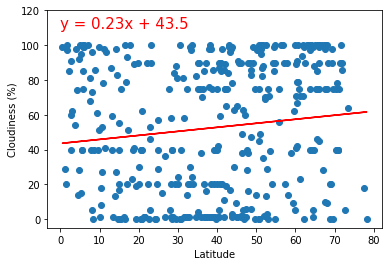

In [123]:
# Add the linear regression equation and line to plot
x_values = north_df["Lat"]
y_values = north_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,110),fontsize=15,color="red")
plt.ylim(-5,120)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Lat_vs_Cloudiness_North.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02611957583728918


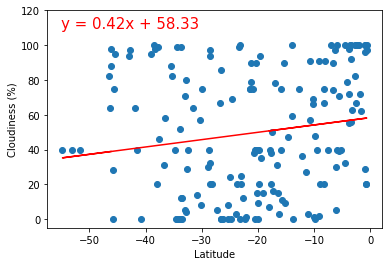

In [124]:
# Add the linear regression equation and line to plot
x_values = south_df["Lat"]
y_values = south_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,110),fontsize=15,color="red")
plt.ylim(-5,120)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Lat_vs_Cloudiness_South.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.045243283805164784


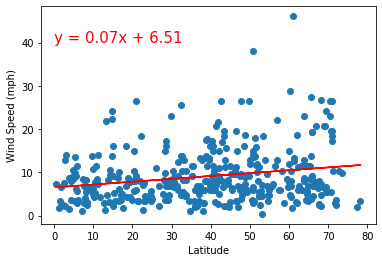

In [125]:
# Add the linear regression equation and line to plot
x_values = north_df["Lat"]
y_values = north_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Lat_vs_Wind_North.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01795352996006617


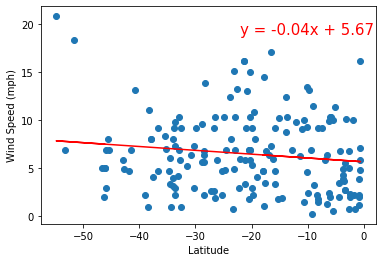

In [126]:
# Add the linear regression equation and line to plot
x_values = south_df["Lat"]
y_values = south_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-22,19),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Lat_vs_Wind_South.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()